In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


In [2]:
#Read whole dataset into pandas.DataFrame

df = pd.read_excel('Demographics_data.xlsx')
df.head()

,Gender,Age,Age_Groups,Marital_Status,Work_Full_Position,Part_Time_Position,Percentage_Full_Time_Equivalent,Retired,Student,Disability_Pension,...,OCIR_ORDERING,OCIR_CHECKING,OCIR_NEUTRALIZING,SUM_ADULT_ADHD_SELF_REPORT_SCALE,SUM_BERGEN_WORK_ADDICTION_SCALE,Workaholism_diagnosis,OCD_DIAGNOSIS,ADHD_DIAGNOSIS,ANXIETY_DIAGNOSIS,DEPRESSION_DIAGNOSIS
0,1,47,4,1,1,0,NaN,0,0,0,...,3,3,3,31,15,0,0,0,0,0
1,2,49,4,2,0,1,60,0,0,0,...,3,3,3,27,9,0,0,0,0,0
2,2,49,4,1,0,1,40,0,0,0,...,3,4,3,33,7,0,0,0,0,0
3,2,39,3,1,1,0,NaN,0,0,0,...,4,3,3,35,8,0,0,0,0,0
4,2,42,3,1,1,0,NaN,0,0,0,...,3,6,3,37,22,0,0,0,0,0


In [3]:
has_na = df.isna().sum()
has_na[has_na>0]

Percentage_Full_Time_Equivalent    13209
dtype: int64

In [4]:
#dropped column with max null values 
df = df.drop('Percentage_Full_Time_Equivalent', axis=1)

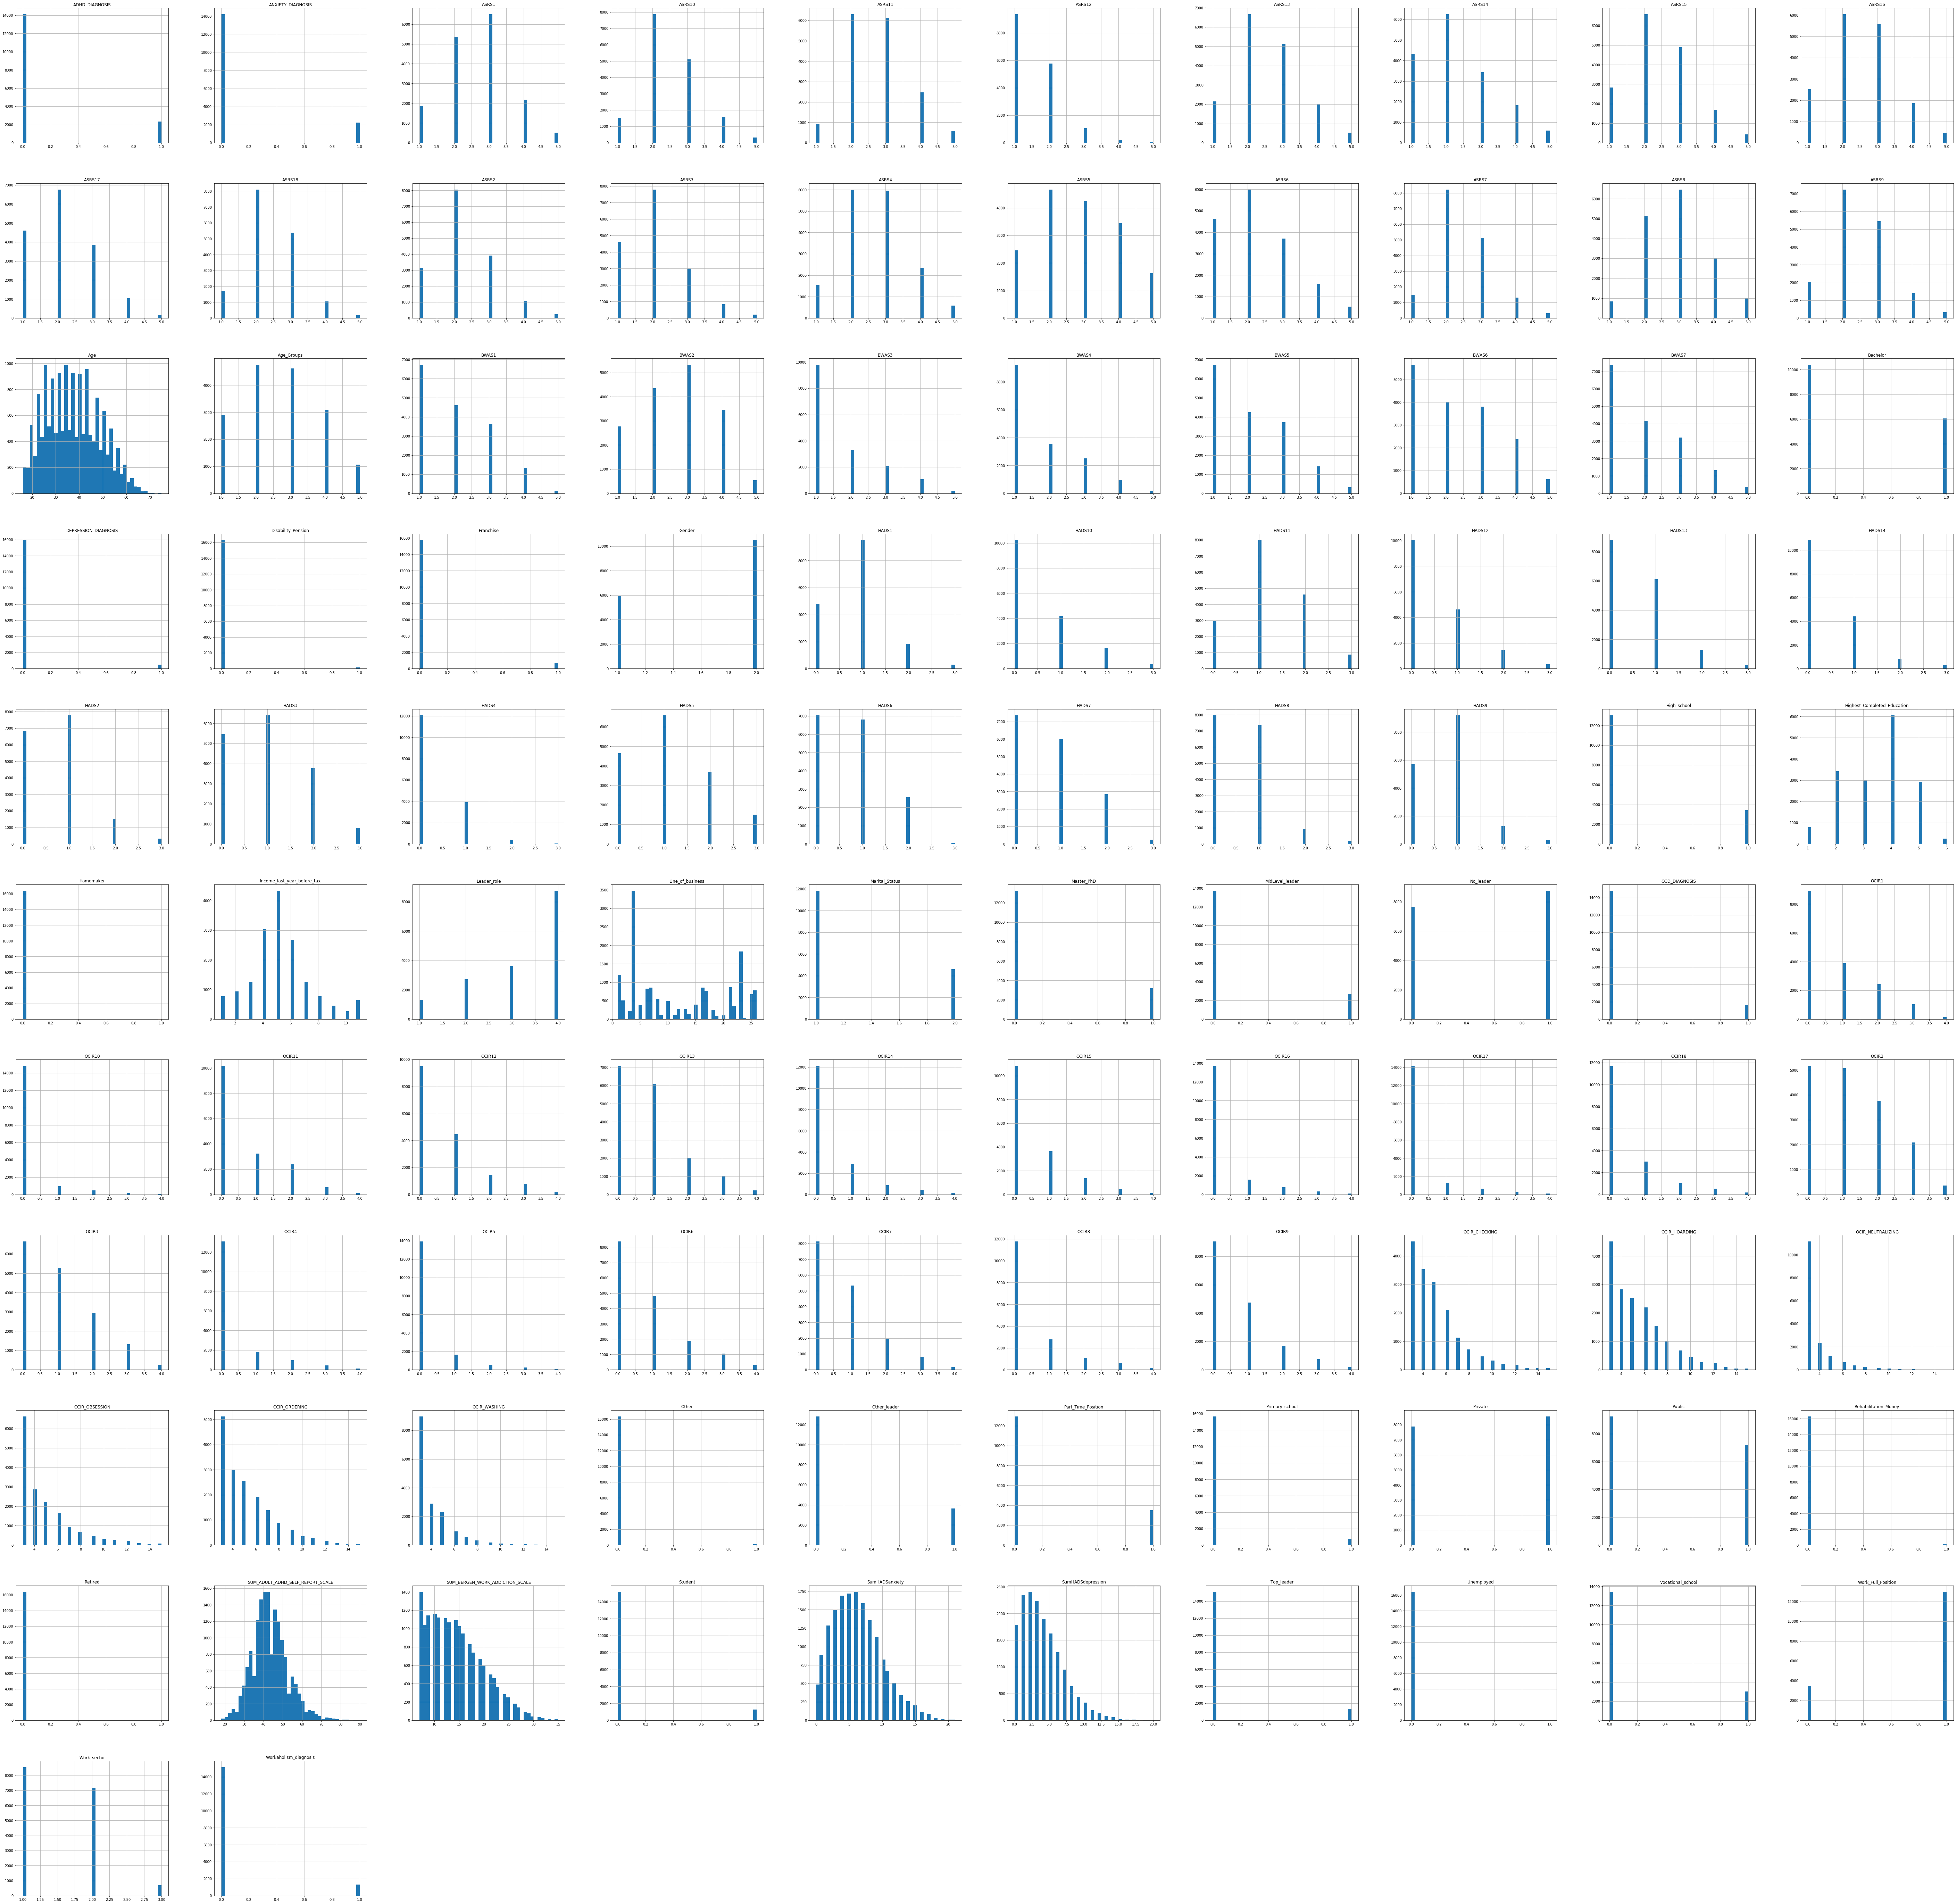

In [43]:
df.hist(bins=40,figsize=(100,100))
plt.show()

In [ ]:
#Boxplot | Correlation | Covariance is good practice for continuous data suiting linear models
#If data is categorical as this, consider using random forest, decision tree or neural networks & check results
#Consider feature engineering post that, if required

In [5]:
#Filtering Out relevant columns
demoDF = df.iloc[:,np.r_[:30,-5]]

demoDF.head()

,Gender,Age,Age_Groups,Marital_Status,Work_Full_Position,Part_Time_Position,Retired,Student,Disability_Pension,Rehabilitation_Money,...,Private,Public,Franchise,Line_of_business,Leader_role,Top_leader,MidLevel_leader,Other_leader,No_leader,Workaholism_diagnosis
0,1,47,4,1,1,0,0,0,0,0,...,1,0,0,1,1,1,0,0,0,0
1,2,49,4,2,0,1,0,0,0,0,...,1,0,0,1,1,1,0,0,0,0
2,2,49,4,1,0,1,0,0,0,0,...,1,0,0,1,1,1,0,0,0,0
3,2,39,3,1,1,0,0,0,0,0,...,0,1,0,1,1,1,0,0,0,0
4,2,42,3,1,1,0,0,0,0,0,...,1,0,0,2,1,1,0,0,0,0


In [6]:
X = demoDF.iloc[:,:-1]
y = demoDF.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

In [7]:
#Train Random Forest Classifier
clf = RandomForestClassifier(n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [8]:
#Apply to Test Data
y_preds = clf.predict(X_test)

clf.predict_proba(X_test)[:10]

array([[1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.9, 0.1],
       [0.5, 0.5],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.9, 0.1]])

In [9]:
#Compare predicted values with actual y_test labels
print(classification_report(y_test, y_preds))

             precision    recall  f1-score   support

          0       0.93      0.98      0.96      3056
          1       0.09      0.03      0.04       230

avg / total       0.87      0.91      0.89      3286



In [11]:
#Analyze decision path for y_test
clf.decision_path(X_test)

(<3286x39650 sparse matrix of type '<class 'numpy.int64'>'
 	with 497419 stored elements in Compressed Sparse Row format>,
 array([    0,  4007,  8022, 11997, 15820, 19787, 23906, 27733, 31664,
        35705, 39650], dtype=int32))

In [83]:
#Check Most important features
featureEngList = list(zip(demoDF.columns, clf.feature_importances_))
featureEngList.sort(key=lambda x: x[1], reverse=True)


featureEngList

[('Age', 0.27715892254681934),
 ('Line_of_business', 0.21228104872579326),
 ('Income_last_year_before_tax', 0.15449458713649983),
 ('Age_Groups', 0.04853959024272921),
 ('Marital_Status', 0.04291473869379207),
 ('Gender', 0.0375844635455054),
 ('Highest_Completed_Education', 0.0358779168915565),
 ('Student', 0.018144196361918347),
 ('Leader_role', 0.01744270880443336),
 ('Bachelor', 0.014422852935227196),
 ('Work_sector', 0.011967471610822936),
 ('Part_Time_Position', 0.011938347677792166),
 ('Vocational_school', 0.011790803722997885),
 ('High_school', 0.011175526374855967),
 ('Master_PhD', 0.011060045137536795),
 ('Work_Full_Position', 0.010742537593984875),
 ('Public', 0.010689888207694828),
 ('MidLevel_leader', 0.009391345734368253),
 ('No_leader', 0.008296572057582646),
 ('Private', 0.008094578609234397),
 ('Primary_school', 0.007287151247700999),
 ('Other_leader', 0.00651125820766211),
 ('Rehabilitation_Money', 0.006319230826114765),
 ('Top_leader', 0.005796665017278142),
 ('Franc